In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('dataset.csv')  # change name if needed

# Quick look
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [38]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [39]:
df = df.dropna(subset=['popularity'])

df = df.drop_duplicates()

df = df.drop(columns=['Unnamed: 0'])

In [40]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [41]:
df['popularity'].describe()
df.shape

(114000, 20)

### Chart 1

In [43]:
df['popularity_bucket'] = pd.cut(
    df['popularity'],
    bins=[0, 40, 70, 100],
    labels=['Low Popularity', 'Mid Popularity', 'High Popularity']
)

df['popularity_bucket'].value_counts()

popularity_bucket
Low Popularity     51306
Mid Popularity     41828
High Popularity     4846
Name: count, dtype: int64

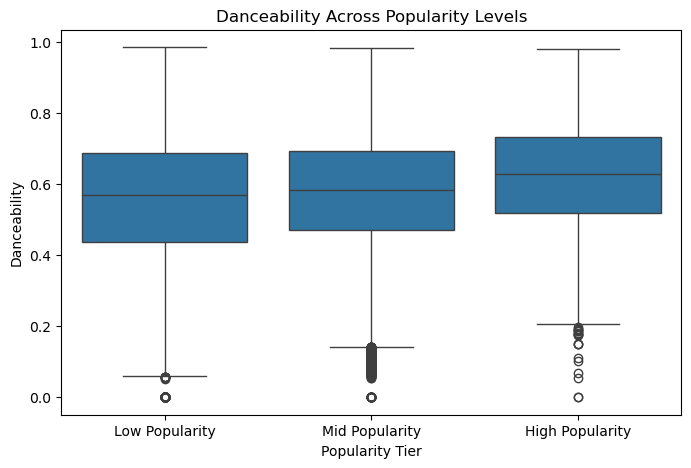

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(x='popularity_bucket', y='danceability', data=df)
plt.title('Danceability Across Popularity Levels')
plt.xlabel('Popularity Tier')
plt.ylabel('Danceability')
plt.show()

Tracks in the high popularity tier exhibit higher median danceability compared to low and mid popularity tracks. From a marketing perspective, this suggests that rhythm-forward songs may perform better in discovery-focused campaigns, playlist placements, and artist launch strategies aimed at broad audience engagement.

### Chart 2

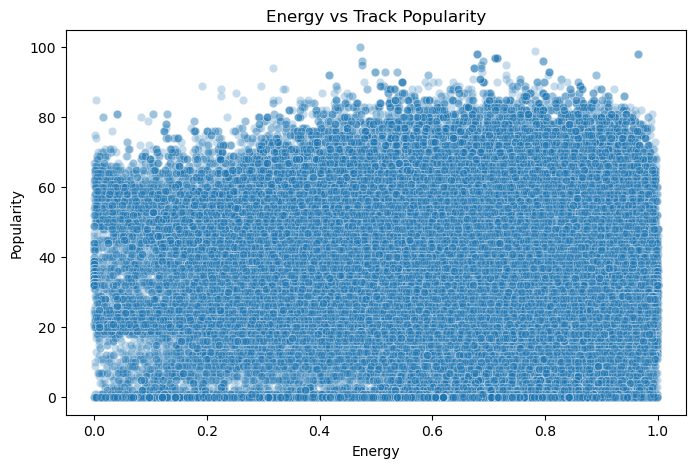

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='energy', y='popularity', data=df, alpha=0.25)
plt.title('Energy vs Track Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()

This dense clustering highlights the diversity of listening behavior across different energy levels. While higher-energy tracks are more prevalent among popular songs, the relationship is not strictly linear. This suggests that energy contributes to discovery and engagement, but must be paired with other factors such as genre alignment, playlist placement, and marketing support to drive widespread popularity.

From a marketing perspective, this indicates that energetic releases may benefit from broader promotional exposure, but successful campaigns should also consider contextual factors such as audience taste and listening moments.

### Chart 3

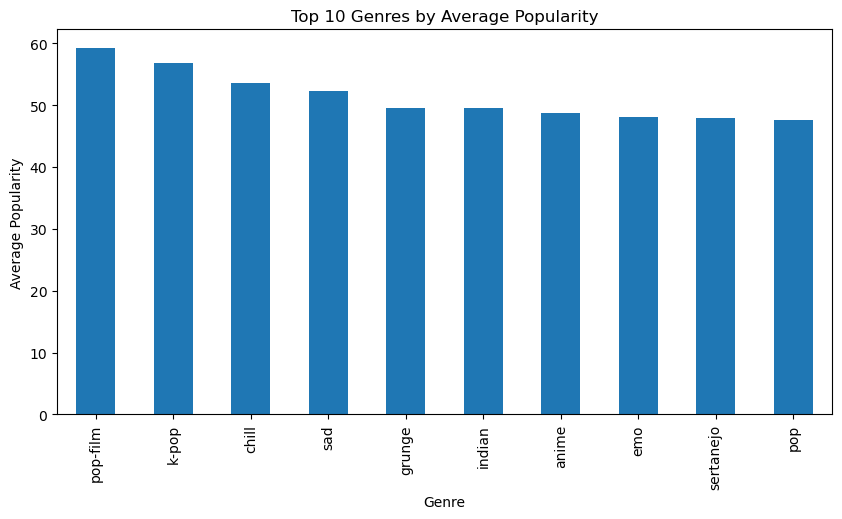

In [50]:
top_genres = (
    df.groupby('track_genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
top_genres.plot(kind='bar')
plt.title('Top 10 Genres by Average Popularity')
plt.ylabel('Average Popularity')
plt.xlabel('Genre')
plt.show()

Pop-adjacent and mood-driven genres demonstrate higher average popularity, highlighting the importance of emotional resonance and mainstream appeal in driving listener engagement. Additionally, the presence of globally influenced genres such as K-pop and Indian music suggests strong opportunities for culturally targeted marketing and international discovery strategies.

Marketing Insights

- Discovery campaigns may benefit from prioritizing pop-adjacent and high-engagement genres to maximize reach and early traction.

- Mood-based playlist strategies can effectively surface emotionally resonant tracks and drive sustained listener engagement.

- Global and culturally specific genres present opportunities for localized marketing campaigns and cross-market promotion.